In [3]:
%matplotlib inline
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt

In [4]:
matplotlib.rcParams.update({'font.size':18}) 
matplotlib.rcParams.update({'font.family':'serif'})

Reading in files:

In [5]:
Kep_ID, Pair_ID, Gal_Prob, Photo_Dist, Pair_Dist = np.loadtxt ('kolby-data.txt', usecols=(0,1,2,3,4), unpack=True)

In [6]:
print (Kep_ID)

[ 7090710.  7090515.  7659417. ...,  8653307.  8588807.  8588660.]


In [7]:
print (Pair_ID)

[    68.     68.     85. ...,  35228.  35247.  35247.]


In [8]:
print (Gal_Prob)

[ 0.003  0.003  0.    ...,  0.025  0.003  0.003]


In [9]:
print (Photo_Dist)

[ 1501.923    1219.7118    274.97043 ...,   373.87689   361.51929
   375.18808]


In [10]:
print (Pair_Dist)

[ 294.09899   294.09899    21.336109 ...,  268.53222   102.38771   102.38771 ]


Tried using np.loadtxt on 'kic_lflare.csv', but kept getting "Value Error: could not convert string to float"

Using np.genfromtxt seemed to work however:

In [11]:
row, Lfl_Lbol, giclr, kicnum = np.genfromtxt('kic_lflare.csv', delimiter = ',', unpack = True)

In [12]:
print (row)

[  0.00000000e+00   1.00000000e+00   2.00000000e+00 ...,   2.07614000e+05
   2.07615000e+05   2.07616000e+05]


In [13]:
print (Lfl_Lbol)

[  0.00000000e+00   5.38317494e-04   0.00000000e+00 ...,   0.00000000e+00
  -1.87030061e-08   0.00000000e+00]


In [14]:
print (giclr)

[ 0.265    -0.087     0.677999 ...,  0.623     0.622001  0.931   ]


In [15]:
print (kicnum)

[ 10000009.  10000056.  10000069. ...,   9999914.   9999949.   9999979.]


In [16]:
m = np.array(np.zeros(len(Kep_ID)), dtype='int')

for k in range (len(Kep_ID)):
    x = np.where((Kep_ID[k] == kicnum))
    m[k] = x[0]
#     Kep_ID == kicnum[x]
    
m
# in database speak, this a Join (Inner Join)
# Kep_ID == kicnum[m]


array([132675, 132661, 144449, ..., 172529, 170764, 170761])

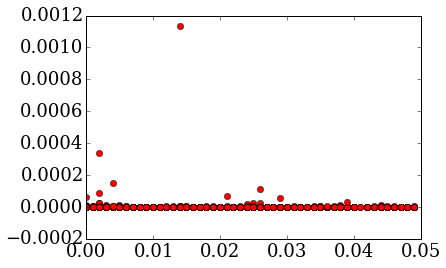

In [17]:
plt.plot(Gal_Prob, Lfl_Lbol[m], 'ro')

In [18]:
kicnum[m] == Kep_ID

array([ True,  True,  True, ...,  True,  True,  True], dtype=bool)

In [19]:
len(Pair_ID)

1094

In [20]:
a = np.arange(0,1094,2)
b = np.arange(1,1094,2)

for j in range(0,len(a)):
    if giclr[m][a[j]] > giclr[m][b[j]]:
        tmp = a[j]
        a[j] = b[j]
        b[j] = tmp

In [21]:
len(a)

547

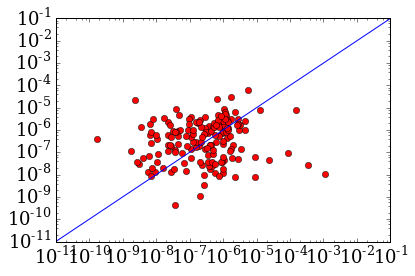

In [22]:
plt.plot(Lfl_Lbol[m][a],Lfl_Lbol[m][b], 'ro')
# plt.xlim(-.000001,.00002)
# plt.ylim(-.000001,.00002)
plt.xlim(1e-11, 1e-1)
plt.ylim(1e-11,  1e-1)
plt.plot([0,1], [0,1])
plt.xscale('log')
plt.yscale('log')

In [23]:
AU_dist = Pair_Dist/3600.*np.pi/180. * Photo_Dist * 206265.
AU_cut = np.where(AU_dist < 120000)
print(np.mean(AU_dist[AU_cut]))

64088.9032584


In [24]:
Good_both_a = np.where((Lfl_Lbol[m][a]>1e-7)  & (Gal_Prob[a]>0.001))
Good_both_b = np.where((Lfl_Lbol[m][b]>1e-7)  & (Gal_Prob[b]>0.001))

Good_either = np.where(((Lfl_Lbol[m][a]>1e-7) | (Lfl_Lbol[m][b]>1e-7)) & 
                       ((Gal_Prob[a]>0.001) | (Gal_Prob[b]>0.001)))



In [25]:
Good_both_a2 = np.where((Lfl_Lbol[m][a]>1e-7)  & (Gal_Prob[a]>0.001) & (AU_dist[a] < 120000))
Good_both_b2 = np.where((Lfl_Lbol[m][b]>1e-7)  & (Gal_Prob[b]>0.001) & (AU_dist[b] < 120000))

Good_either2 = np.where(((Lfl_Lbol[m][a]>1e-7) | (Lfl_Lbol[m][b]>1e-7)) & 
                       ((Gal_Prob[a]>0.001) | (Gal_Prob[b]>0.001)) & 
                       (AU_dist[a] < 120000))


In [26]:
print(len(Lfl_Lbol[m][a][Good_both_a]))
print(len(Lfl_Lbol[m][b][Good_both_b]))
print(len(Lfl_Lbol[m][a][Good_both_a2]))
print(len(Lfl_Lbol[m][b][Good_both_b2]))


166
197
65
88


In [27]:
print(len(Lfl_Lbol[m][a][Good_either]))
print(len(Lfl_Lbol[m][b][Good_either]))
print(len(Lfl_Lbol[m][a][Good_either2]))
print(len(Lfl_Lbol[m][b][Good_either2]))

290
290
125
125


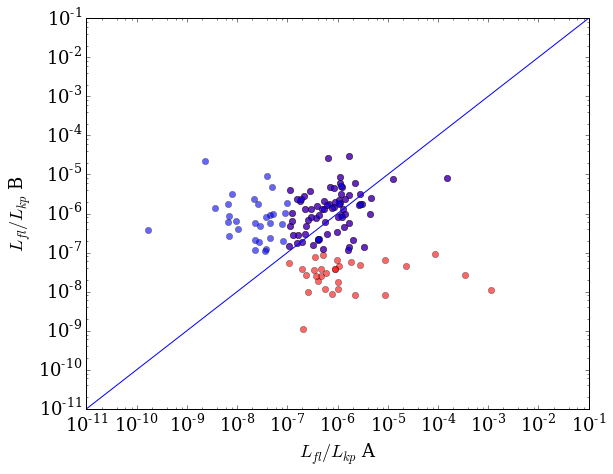

In [28]:
plt.figure(figsize=(9,7))
plt.plot(Lfl_Lbol[m][a][Good_both_a], Lfl_Lbol[m][b][Good_both_a], 'ro', alpha = 0.6)
plt.plot(Lfl_Lbol[m][a][Good_both_b], Lfl_Lbol[m][b][Good_both_b], 'bo', alpha = 0.6)
plt.xlim(1e-11, 1e-1)
plt.ylim(1e-11,  1e-1)
plt.plot([1e-11,1], [1e-11,1])
# plt.plot([1e-11,1]*2, [1e-11,1]*2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$L_{fl}/L_{kp}$ A')
plt.ylabel('$L_{fl}/L_{kp}$ B')
plt.savefig('AB.png', dpi=1000)

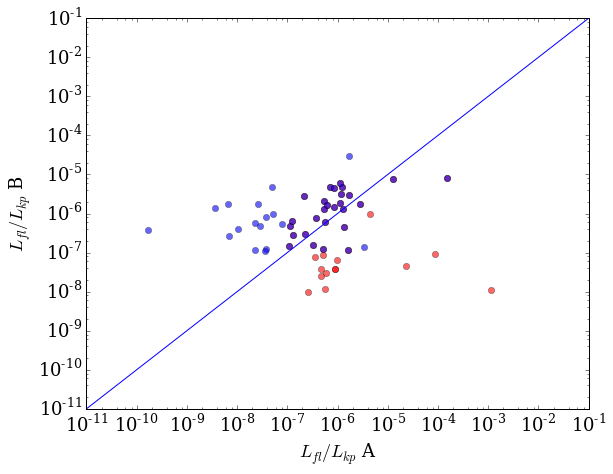

In [29]:
plt.figure(figsize=(9,7))
plt.plot(Lfl_Lbol[m][a][Good_both_a2], Lfl_Lbol[m][b][Good_both_a2], 'ro', alpha = 0.6)
plt.plot(Lfl_Lbol[m][a][Good_both_b2], Lfl_Lbol[m][b][Good_both_b2], 'bo', alpha = 0.6)
plt.xlim(1e-11, 1e-1)
plt.ylim(1e-11,  1e-1)
plt.plot([1e-11,1], [1e-11,1])
# plt.plot([1e-11,1]*2, [1e-11,1]*2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$L_{fl}/L_{kp}$ A')
plt.ylabel('$L_{fl}/L_{kp}$ B')
plt.savefig('AB.png', dpi=1000)

/Users/Riley/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
/Users/Riley/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


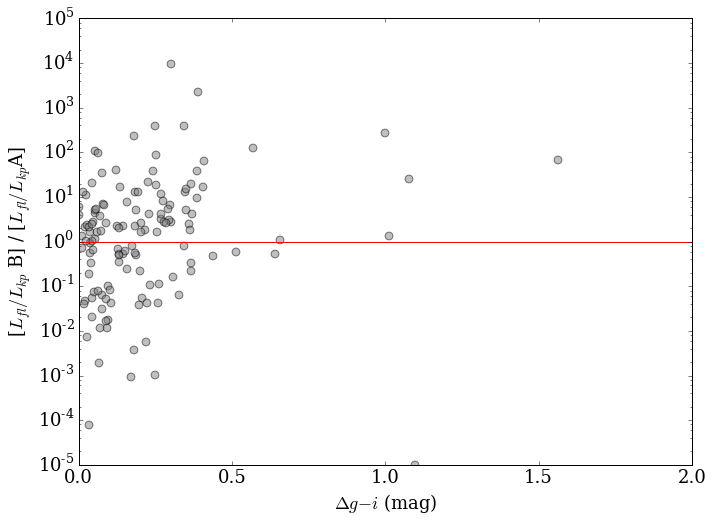

'Frac > 1 and Frac < 1'

In [30]:
plt.figure(figsize=(11,8))
plt.scatter(giclr[m][b][Good_either] - giclr[m][a][Good_either],
            Lfl_Lbol[m][b][Good_either]/Lfl_Lbol[m][a][Good_either], 
            facecolor = '0.5',  alpha=0.5, s=60)
#plt.scatter(giclr[m][a][Good_both_a] - giclr[m][b][Good_both_a],Lfl_Lbol[m][a][Good_both_a]/Lfl_Lbol[m][b][Good_both_a], color = 'r', alpha=0.5, s=90)
#plt.scatter(giclr[m][a][Good_both_b] - giclr[m][b][Good_both_b],Lfl_Lbol[m][a][Good_both_b]/Lfl_Lbol[m][b][Good_both_b], color = 'b', alpha=0.5, s=90)
plt.xlim(0,2)
plt.ylim(1e-5,  1e5)
plt.plot([-2,2],[1e0,1e0], color = 'r')
#plt.plot([0,0],[1e-6,1e4], color = 'r')
#plt.xscale('log')
plt.yscale('log')
plt.xlabel('$\Delta g-i$ (mag)')
plt.ylabel('[$L_{fl}/L_{kp}$ B] / [$L_{fl}/L_{kp}$A]')
plt.savefig('Color_Diagram_NEW', dpi=1000)
plt.show()

"Frac > 1 and Frac < 1"

/Users/Riley/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
/Users/Riley/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


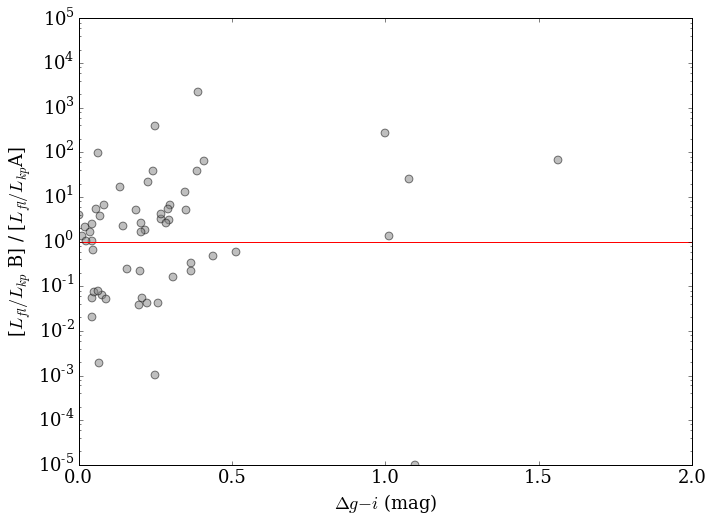

'Frac > 1 and Frac < 1'

In [31]:
plt.figure(figsize=(11,8))
plt.scatter(giclr[m][b][Good_either2] - giclr[m][a][Good_either2],
            Lfl_Lbol[m][b][Good_either2]/Lfl_Lbol[m][a][Good_either2], 
            facecolor = '0.5',  alpha=0.5, s=60)
#plt.scatter(giclr[m][a][Good_both_a] - giclr[m][b][Good_both_a],Lfl_Lbol[m][a][Good_both_a]/Lfl_Lbol[m][b][Good_both_a], color = 'r', alpha=0.5, s=90)
#plt.scatter(giclr[m][a][Good_both_b] - giclr[m][b][Good_both_b],Lfl_Lbol[m][a][Good_both_b]/Lfl_Lbol[m][b][Good_both_b], color = 'b', alpha=0.5, s=90)
plt.xlim(0,2)
plt.ylim(1e-5,  1e5)
plt.plot([-2,2],[1e0,1e0], color = 'r')
#plt.plot([0,0],[1e-6,1e4], color = 'r')
#plt.xscale('log')
plt.yscale('log')
plt.xlabel('$\Delta g-i$ (mag)')
plt.ylabel('[$L_{fl}/L_{kp}$ B] / [$L_{fl}/L_{kp}$A]')
plt.savefig('Color_Diagram_NEW', dpi=1000)
plt.show()

"Frac > 1 and Frac < 1"

Edits to make:
1. Histogram of A[good]-star g-i color

2. Make one cut in median of A-star color distribution 

3. Remake g-i plot with two subpopulations with colored points: Red points: Redder A-stars; Blue points: Bluer A-stars

0.738


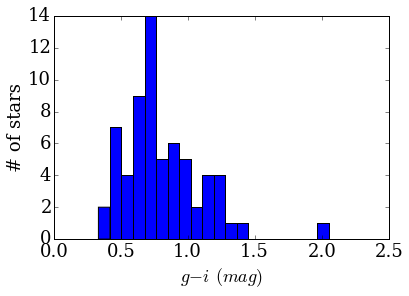

In [73]:
plt.hist(giclr[m][a][Good_both_a2], bins=20)
plt.ylabel('# of stars')
plt.xlabel('$g-i\,(mag)$')
plt.savefig('A-starClrHist')
print(np.median(giclr[m][a][Good_both_a2]))

In [46]:
gi_redcut= np.where(giclr[m][a][Good_both_a2] < np.median(giclr[m][a][Good_both_a2]))
gi_bluecut= np.where(giclr[m][a][Good_both_a2] > np.median(giclr[m][a][Good_both_a2]))                    

/Users/Riley/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
/Users/Riley/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in true_divide
/Users/Riley/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


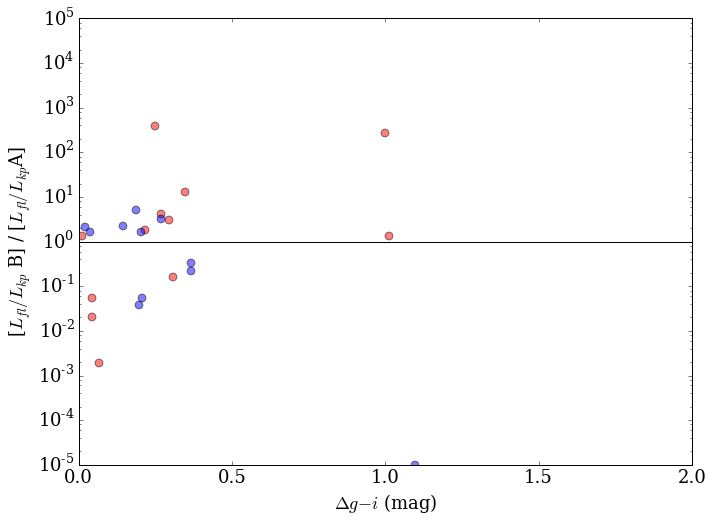

In [74]:
plt.figure(figsize=(11,8))
plt.scatter(giclr[m][b][Good_either2][gi_redcut] - giclr[m][a][Good_either2][gi_redcut],
            Lfl_Lbol[m][b][Good_either2][gi_redcut]/Lfl_Lbol[m][a][Good_either2][gi_redcut], c='r', alpha=0.5,s=60)

plt.scatter(giclr[m][b][Good_either2][gi_bluecut] - giclr[m][a][Good_either2][gi_bluecut],
            Lfl_Lbol[m][b][Good_either2][gi_bluecut]/Lfl_Lbol[m][a][Good_either2][gi_bluecut], c='b', alpha=0.5,s=60)
plt.xlim(0,2)
plt.ylim(1e-5,  1e5)
plt.plot([-2,2],[1e0,1e0], color = 'k')
plt.xlabel('$\Delta g-i$ (mag)')
plt.ylabel('[$L_{fl}/L_{kp}$ B] / [$L_{fl}/L_{kp}$A]')
plt.yscale('log')
plt.savefig('Color_diagram_v3')

In [36]:
sum(Lfl_Lbol[m][b][Good_either]/Lfl_Lbol[m][a][Good_either] < 1)

/Users/Riley/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


142

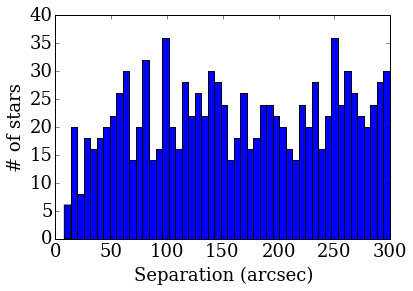

In [37]:
plt.hist(Pair_Dist, bins=50)
plt.xlabel('Separation (arcsec)')
plt.ylabel('# of stars')
plt.savefig('Pair Distances', dpi = 300)

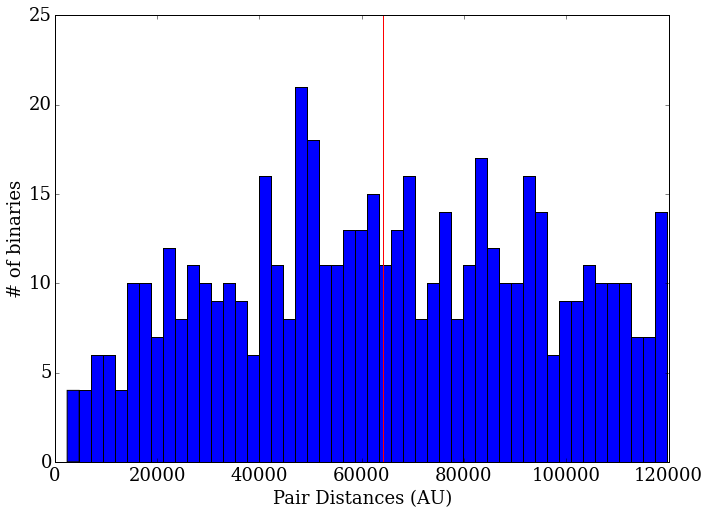

In [38]:
plt.figure(figsize=(11,8))
plt.hist((AU_dist[AU_cut]), bins = 50)
plt.plot([64088.9,64088.9],[0,25],'r')
plt.xlabel('Pair Distances (AU)')
plt.ylabel('# of binaries')
plt.savefig('AU_pairdist', dpi = 1000)


In [ ]:
n = np.where((Lfl_Lbol[m][a]/Lfl_Lbol[m][b] > 0.80) & (Lfl_Lbol[m][a]/Lfl_Lbol[m][b] < 1.2))
print(np.size(n))
print(n)

In [ ]:
plt.plot(Lfl_Lbol[m][a], Lfl_Lbol[m][a]/Lfl_Lbol[m][b], 'ro')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('[$L_{fl}/L_{kp}$ A]')
plt.ylabel('[$L_{fl}/L_{kp}$ A] / [$L_{fl}/L_{kp}$B]')
plt.plot([1e-10,1e-3],[1e0,1e0])
plt.ylim(-1e-6, 1e4)
plt.xlim(-1e-11, 1e-3)
plt.savefig('')

In [ ]:
plt.plot(Lfl_Lbol[m][a][n], Lfl_Lbol[m][a][n]/Lfl_Lbol[m][b][n], 'ro')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('[$L_{fl}/L_{kp}$ A]')
plt.ylabel('[$L_{fl}/L_{kp}$ A] / [$L_{fl}/L_{kp}$B]')
plt.plot([1e-10,1e-3],[1e0,1e0])

In [ ]:
giclr

In [ ]:
for j in range (len(giclr)-1):
    if (j % 2 == 0) & (giclr[j] > giclr[j+1]): 
        giclr[j], giclr[j+1] = giclr[j+1], giclr[j]
        Lfl_Lbol[j], Lfl_Lbol[j+1] =  Lfl_Lbol[j+1], Lfl_Lbol[j]
       

In [ ]:
print(giclr)
print(np.size(giclr))

In [ ]:
ag = np.arange(0,207616,2)
bg = np.arange(1,207617,2)

In [ ]:
plt.scatter(giclr[ag]-giclr[bg],giclr[ag])
plt.xlim(-6,1)
plt.ylim(-2,4)

In [ ]:
giclr[m]

In [ ]:
for k in range (len(giclr[m])-1):
    if (k % 2 == 0) & (giclr[m][k] > giclr[m][k+1]): 
        giclr[m][k], giclr[m][k+1] = giclr[m][k+1], giclr[m][k]
         
       

In [ ]:
print(giclr[m])
print(np.size(giclr[m]))


In [ ]:
plt.scatter(giclr[m][a]-giclr[m][b],giclr[m][a])